In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### Загрузим таблицу и исследуем ее данные

In [2]:
df_credits = pd.read_excel('TaiwanCreditDefaults.xls', header=1)
df_credits.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df_credits.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [4]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Проведем  анализ данных

 Построим 2 гистограммы:
 1. Распределение количества людей(в процентах) заплативших по кредиту. 
 2. Распределение людей по полу(в процентах).

In [5]:
w1 = np.ones(len(df_credits['default payment next month'])) / len(df_credits['default payment next month'])
w2 = np.ones(len(df_credits['SEX'])) / len(df_credits['SEX']) 

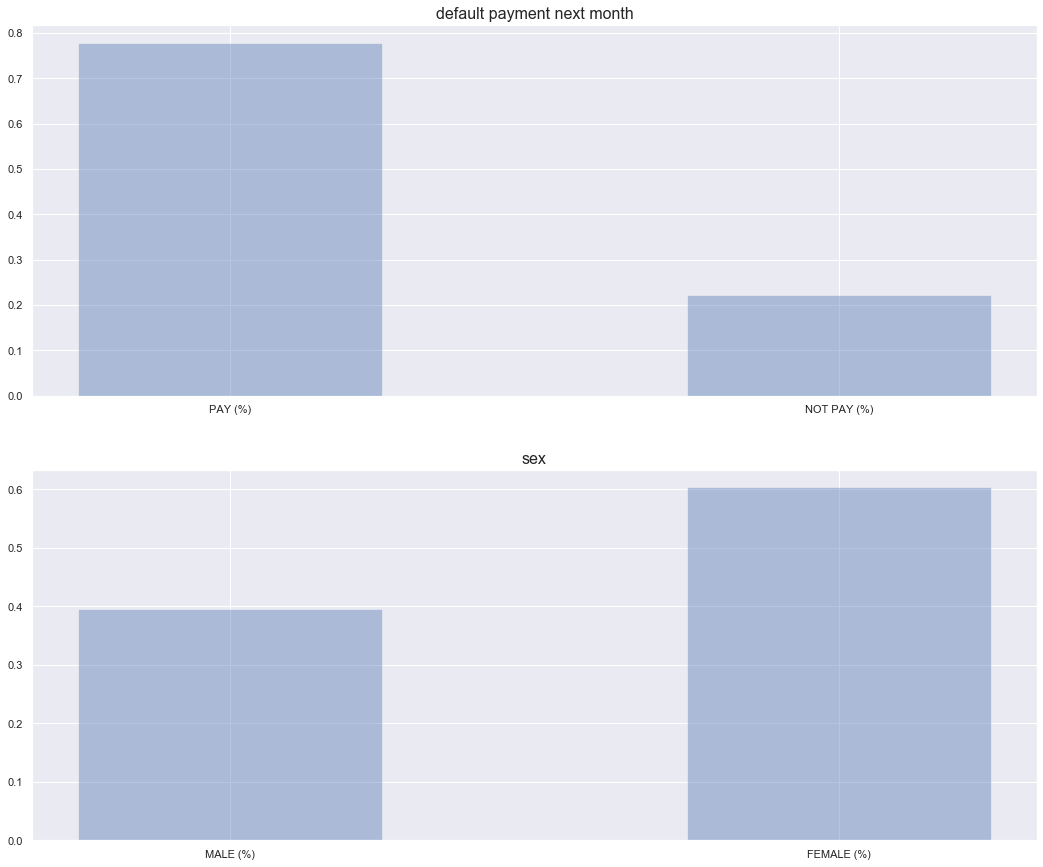

In [6]:
fig, ax = plt.subplots(2)

ax[0].hist(df_credits['default payment next month'], weights = w1, bins=np.arange(-0.25, 1.75, 0.5), alpha=0.4)
ax[1].hist(df_credits['SEX'], weights = w2, bins=np.arange(0.75, 2.75, 0.5), alpha=0.4)

ax[0].set_title('default payment next month', size=16)
ax[1].set_title('sex', size=16)

ax[0].set_xticks(np.arange(0,2))
labels=['PAY (%)','NOT PAY (%)']
ax[0].set_xticklabels(labels)

ax[1].set_xticks(np.arange(1,3))
labels=['MALE (%)','FEMALE (%)']
ax[1].set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(15)   

plt.show()

Рассмотрим зависимость лимита по карте от возраста

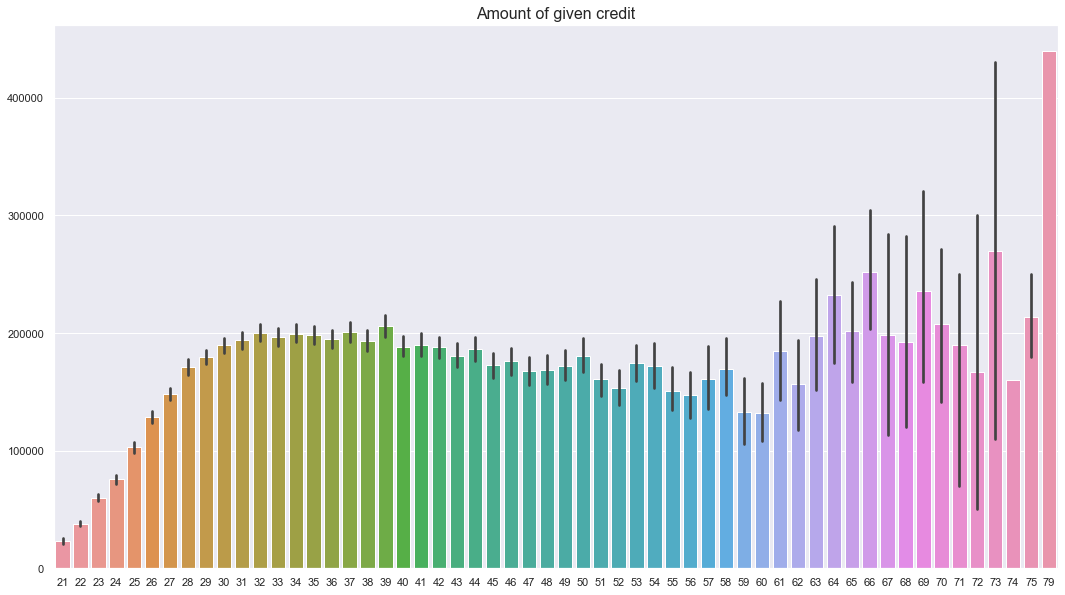

In [7]:
fig, ax = plt.subplots()
sns.barplot(df_credits['AGE'], df_credits['LIMIT_BAL'])

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Amount of given credit', size=16)
fig.set_size_inches(18, 10)

Рассмотрим зависимость погашения долга от семейного положения

In [8]:
marital_status1 = df_credits[df_credits['MARRIAGE'] == 1]['default payment next month']
marital_status2 = df_credits[df_credits['MARRIAGE'] == 2]['default payment next month']
marital_status3 = df_credits[df_credits['MARRIAGE'] == 3]['default payment next month']

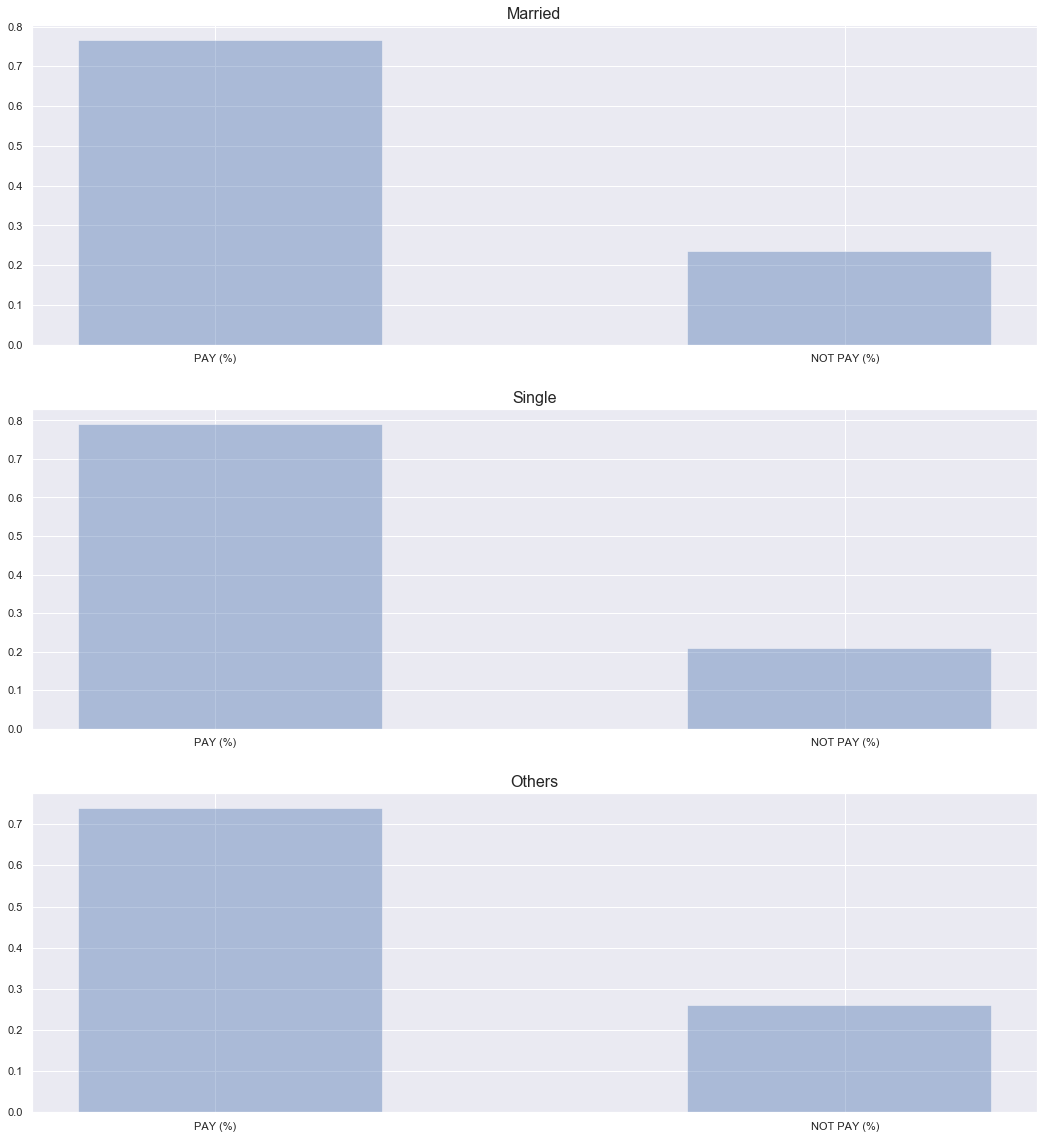

In [9]:
fig, ax = plt.subplots(3)

ax[0].hist(marital_status1, weights=np.ones(len(marital_status1)) / len(marital_status1), bins=3, alpha=0.4)
ax[1].hist(marital_status2, weights=np.ones(len(marital_status2)) / len(marital_status2), bins=3, alpha=0.4)
ax[2].hist(marital_status3, weights=np.ones(len(marital_status3)) / len(marital_status3), bins=3, alpha=0.4)

ax[0].set_title('Married', size=16)
ax[1].set_title('Single', size=16)
ax[2].set_title('Others', size=16)

ax[0].set_xticks([0.15, 0.84])
labels=['PAY (%)','NOT PAY (%)']
ax[0].set_xticklabels(labels)

ax[1].set_xticks([0.15, 0.84])
ax[1].set_xticklabels(labels)

ax[2].set_xticks([0.15, 0.84])
ax[2].set_xticklabels(labels)


fig.set_figwidth(18)
fig.set_figheight(20) 

In [10]:
y = [ 1 - marital_status1.sum() / len(marital_status1),
    1 - marital_status2.sum() / len(marital_status2),
    1 - marital_status3.sum() / len(marital_status3),
    ]

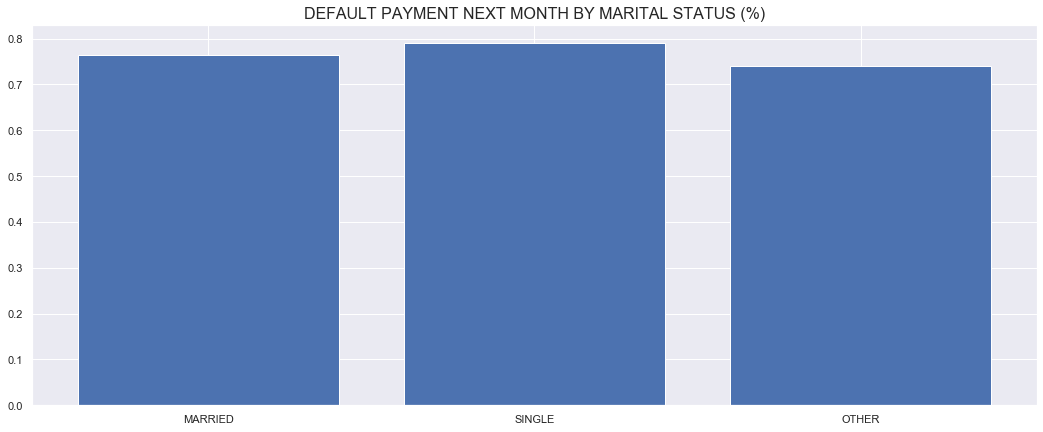

In [11]:
fig, ax = plt.subplots()

ax.bar([1, 2, 3], y)
ax.set_title('DEFAULT PAYMENT NEXT MONTH BY MARITAL STATUS (%)', size=16)

ax.set_xticks(np.arange(1,4))
labels=['MARRIED', 'SINGLE', 'OTHER']
ax.set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(7)   

Рассмотрим зависимость погашения долга от возроста

In [12]:
age_categry1 = df_credits[df_credits['AGE'] <= 35]['default payment next month']
age_categry2 = df_credits[(df_credits['AGE'] > 35) & (df_credits['AGE'] <= 50)]['default payment next month']
age_categry3 = df_credits[df_credits['AGE'] > 50]['default payment next month']

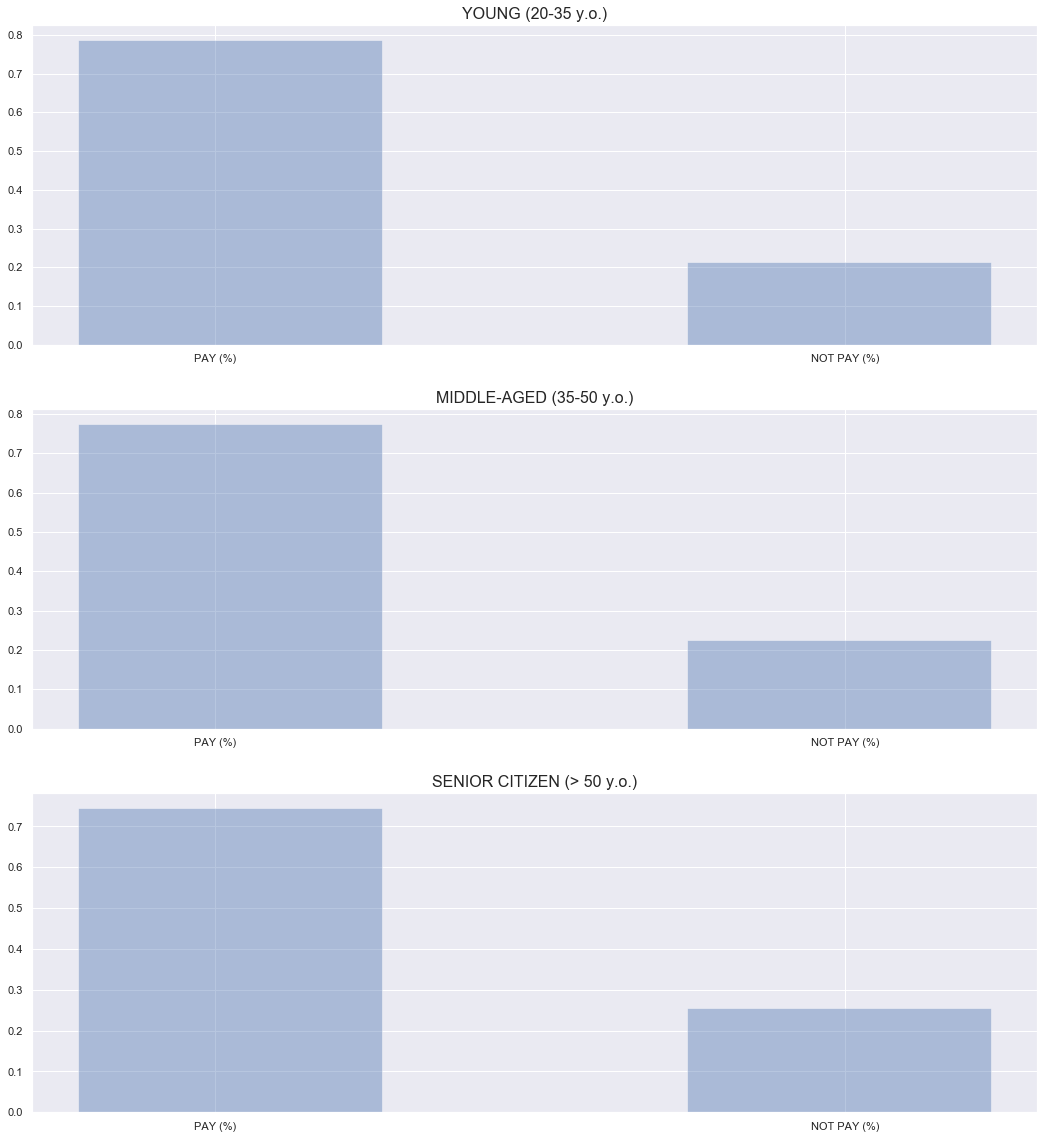

In [13]:
fig, ax = plt.subplots(3)

ax[0].hist(age_categry1, weights=np.ones(len(age_categry1)) / len(age_categry1), bins=3, alpha=0.4)
ax[1].hist(age_categry2, weights=np.ones(len(age_categry2)) / len(age_categry2), bins=3, alpha=0.4)
ax[2].hist(age_categry3, weights=np.ones(len(age_categry3)) / len(age_categry3), bins=3, alpha=0.4)

ax[0].set_title('YOUNG (20-35 y.o.)', size=16)
ax[1].set_title('MIDDLE-AGED (35-50 y.o.)', size=16)
ax[2].set_title('SENIOR CITIZEN (> 50 y.o.)', size=16)

ax[0].set_xticks([0.15, 0.84])
labels=['PAY (%)','NOT PAY (%)']
ax[0].set_xticklabels(labels)

ax[1].set_xticks([0.15, 0.84])
ax[1].set_xticklabels(labels)

ax[2].set_xticks([0.15, 0.84])
ax[2].set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(20) 

In [14]:
y = [ 1 - age_categry1.sum() / len(age_categry1),
    1 - age_categry2.sum() / len(age_categry2),
    1 - age_categry3.sum() / len(age_categry3),
    ]

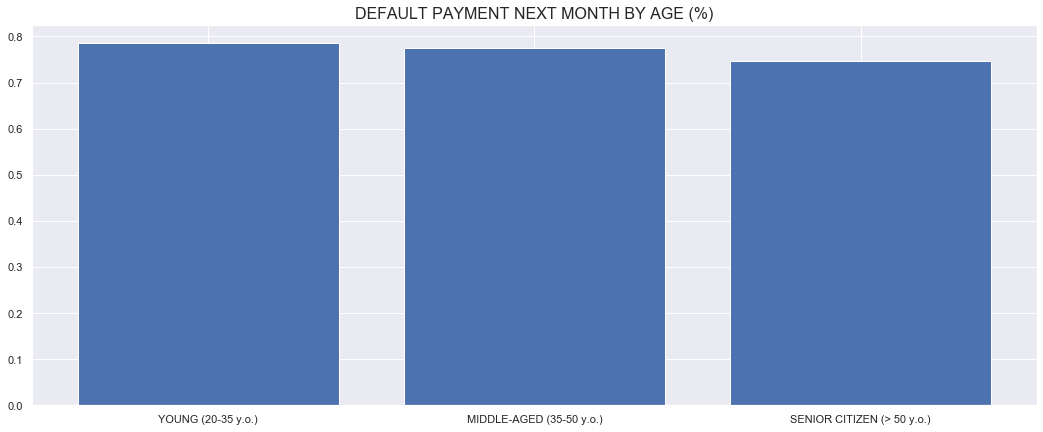

In [15]:
fig, ax = plt.subplots()

ax.bar([1, 2, 3], y)
ax.set_title('DEFAULT PAYMENT NEXT MONTH BY AGE (%)', size=16)

ax.set_xticks(np.arange(1,4))
labels=['YOUNG (20-35 y.o.)', 'MIDDLE-AGED (35-50 y.o.)', 'SENIOR CITIZEN (> 50 y.o.)']
ax.set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(7)   

Рассмотрим зависимость погашения долга от пола

In [16]:
male = df_credits[df_credits['SEX'] == 1]['default payment next month']
female = df_credits[df_credits['SEX'] == 2]['default payment next month']

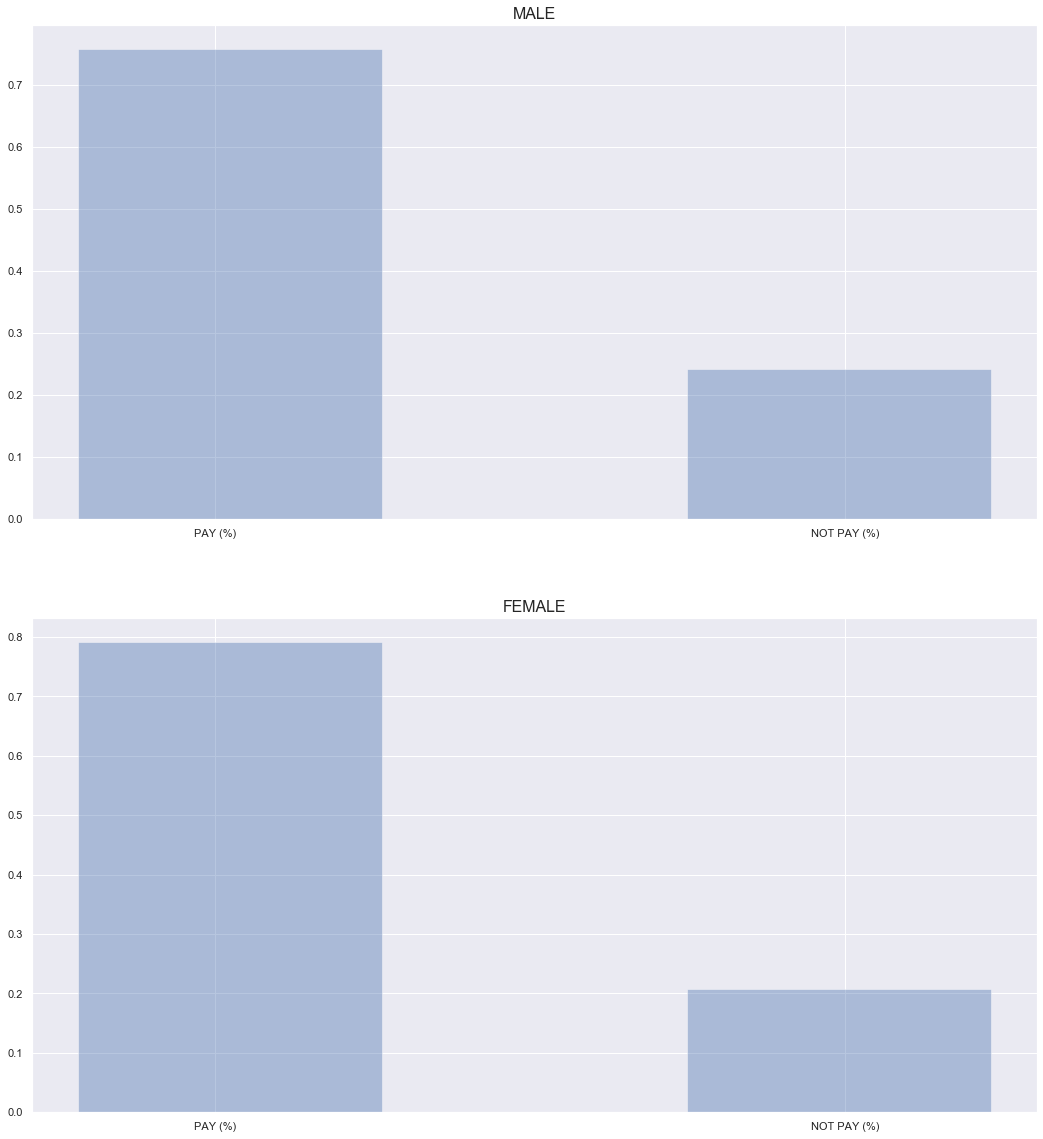

In [17]:
fig, ax = plt.subplots(2)

ax[0].hist(male, weights=np.ones(len(male)) / len(male), bins=3, alpha=0.4)
ax[1].hist(female, weights=np.ones(len(female)) / len(female), bins=3, alpha=0.4)

ax[0].set_title('MALE', size=16)
ax[1].set_title('FEMALE', size=16)

ax[0].set_xticks([0.15, 0.84])
labels=['PAY (%)','NOT PAY (%)']
ax[0].set_xticklabels(labels)

ax[1].set_xticks([0.15, 0.84])
ax[1].set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(20) 

In [18]:
y = [ 1 - male.sum() / len(male),
    1 - female.sum() / len(female)]

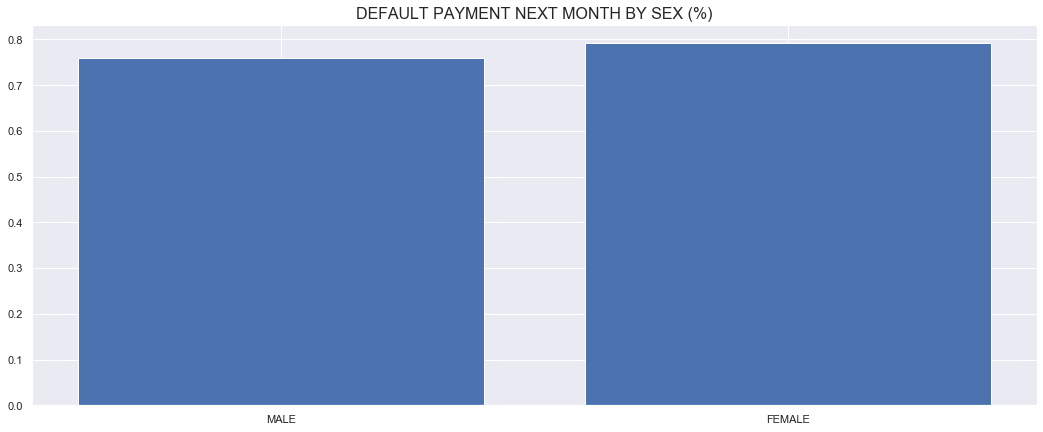

In [19]:
fig, ax = plt.subplots()

ax.bar([1, 2], y)
ax.set_title('DEFAULT PAYMENT NEXT MONTH BY SEX (%)', size=16)

ax.set_xticks(np.arange(1,3))
labels=['MALE', 'FEMALE']
ax.set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(7)   

Рассмотрим зависимость погашения долга от образования

In [20]:
graduate_school = df_credits[df_credits['EDUCATION'] == 1]['default payment next month']
university = df_credits[df_credits['EDUCATION'] == 2]['default payment next month']
high_school = df_credits[df_credits['EDUCATION'] == 3]['default payment next month']
others = df_credits[df_credits['EDUCATION'] == 4]['default payment next month']

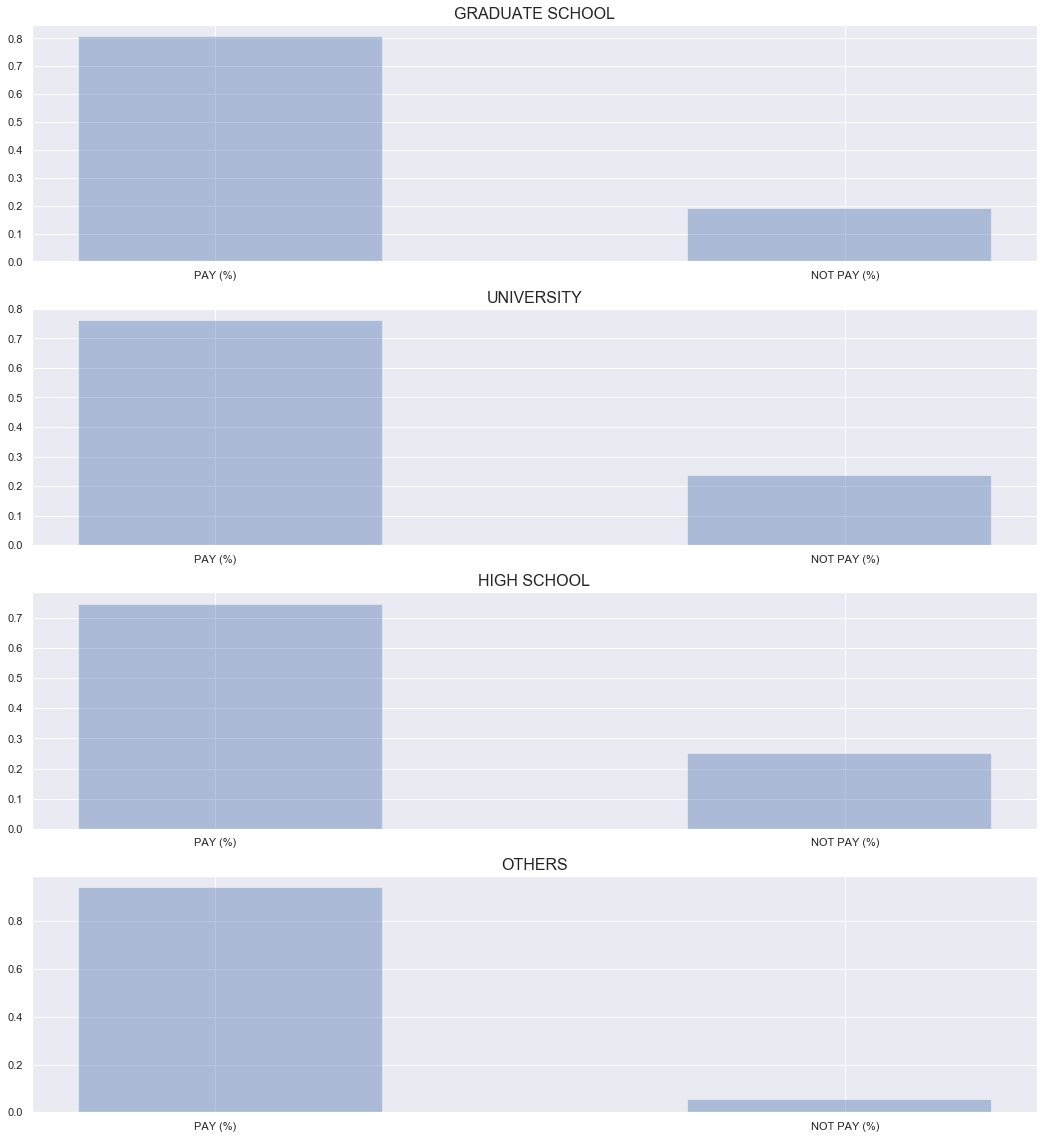

In [22]:
fig, ax = plt.subplots(4)

ax[0].hist(graduate_school, weights=np.ones(len(graduate_school)) / len(graduate_school), bins=3, alpha=0.4)
ax[1].hist(university, weights=np.ones(len(university)) / len(university), bins=3, alpha=0.4)
ax[2].hist(high_school, weights=np.ones(len(high_school)) / len(high_school), bins=3, alpha=0.4)
ax[3].hist(others, weights=np.ones(len(others)) / len(others), bins=3, alpha = 0.4)

ax[0].set_title('GRADUATE SCHOOL', size=16)
ax[1].set_title('UNIVERSITY', size=16)
ax[2].set_title('HIGH SCHOOL', size=16)
ax[3].set_title('OTHERS', size=16)

ax[0].set_xticks([0.15, 0.84])
labels=['PAY (%)','NOT PAY (%)']
ax[0].set_xticklabels(labels)

ax[1].set_xticks([0.15, 0.84])
ax[1].set_xticklabels(labels)

ax[2].set_xticks([0.15, 0.84])
ax[2].set_xticklabels(labels)

ax[3].set_xticks([0.15, 0.84])
ax[3].set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(20) 

In [23]:
y = [ 1 - graduate_school.sum() / len(age_categry1),
    1 - university.sum() / len(age_categry2),
    1 - high_school.sum() / len(age_categry3),
     1- others.sum() / len(others)
    ]

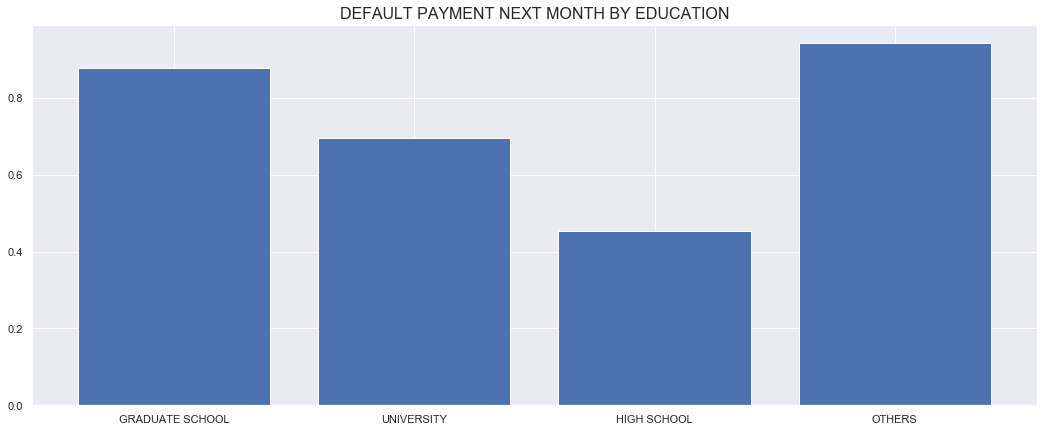

In [28]:
fig, ax = plt.subplots()

ax.bar([1, 2, 3, 4], y)
ax.set_title('DEFAULT PAYMENT NEXT MONTH BY EDUCATION', size=16)

ax.set_xticks(np.arange(1,5))
labels=['GRADUATE SCHOOL', 'UNIVERSITY', 'HIGH SCHOOL', 'OTHERS']
ax.set_xticklabels(labels)

fig.set_figwidth(18)
fig.set_figheight(7)  

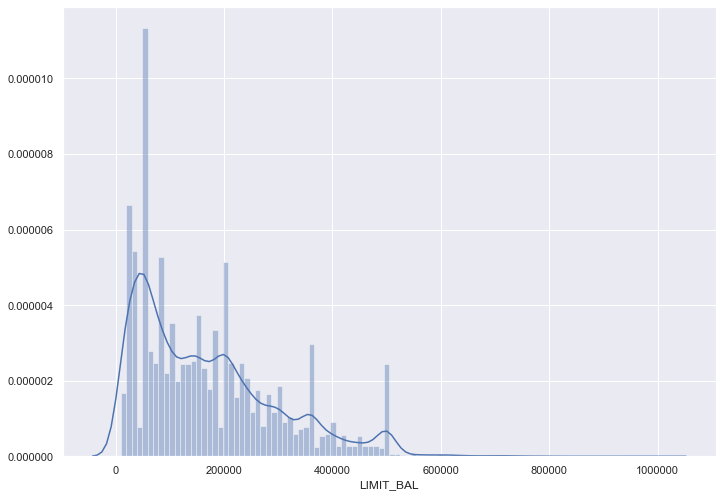

In [384]:
sns.distplot(df_credits['LIMIT_BAL'],bins=100)

 Посчитаем попарную корреляцию столбцов и представим результат в виде тепловой карты

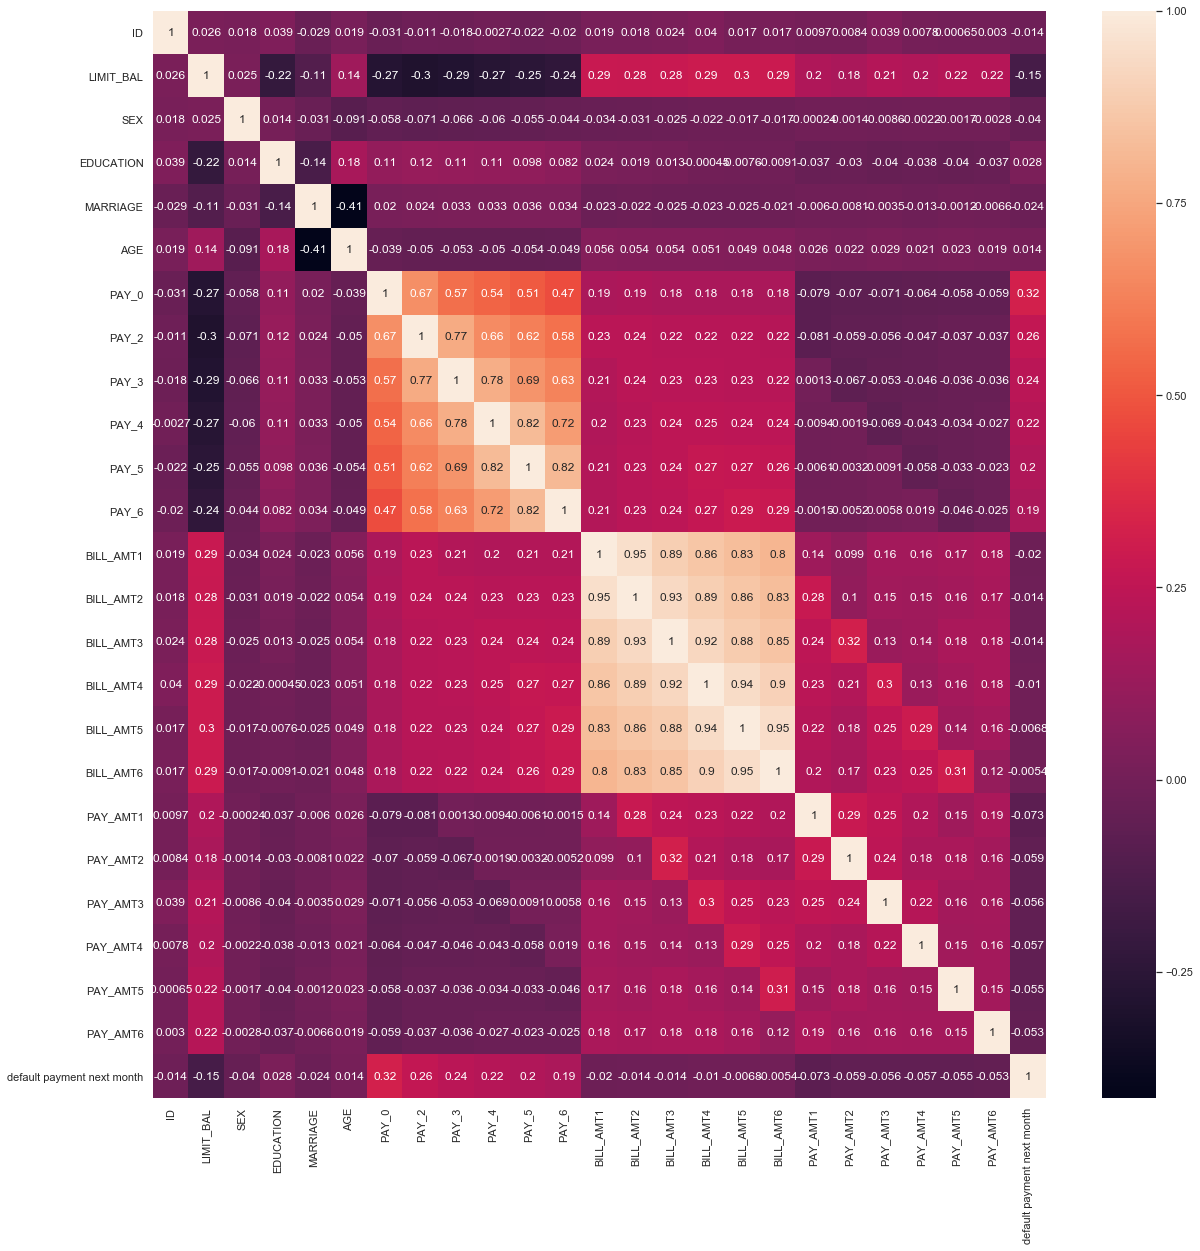

In [385]:
plt.figure(figsize=(20,20))
sns.heatmap(df_credits.corr(),annot=True)


Рассмотрим взаимосвязь выплаты по кредитной карте с другими данными из таблицы

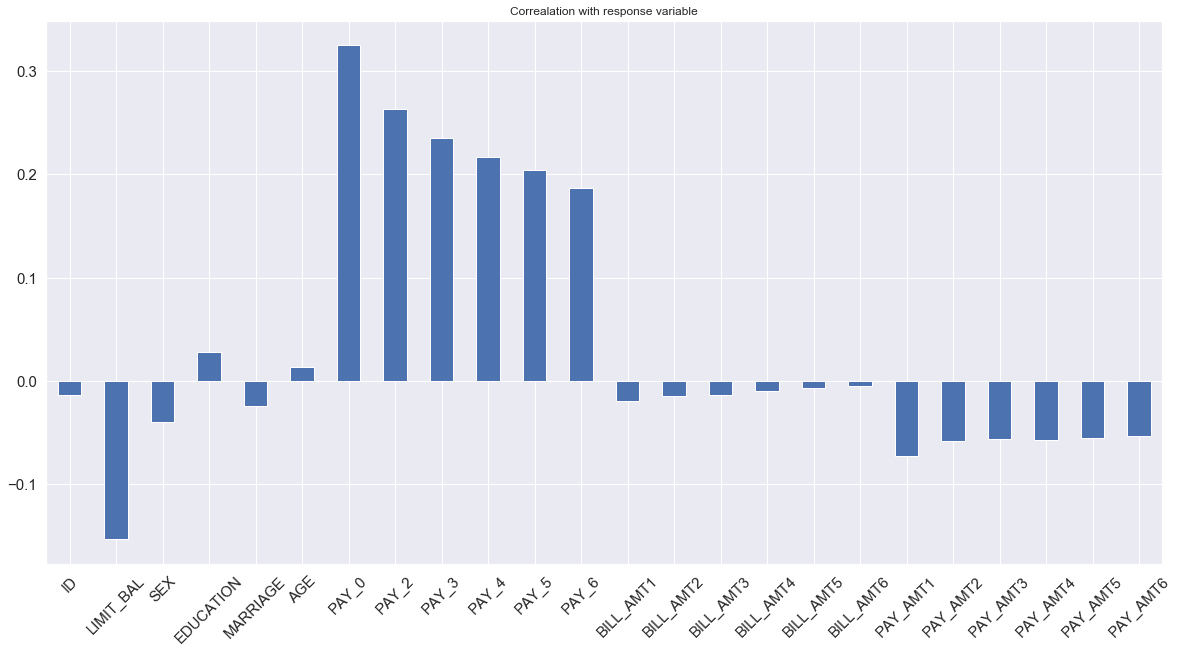

In [386]:
X = df_credits.drop(['default payment next month'], axis=1)
Y = df_credits['default payment next month']

X.corrwith(Y).plot.bar(figsize=(20,10),title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

Выкинем из таблицы X те столбцы, корреляция которых с выплатой по карте незначительная

In [387]:
X_new = X.drop(['ID','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1)

Стандартизуем данные

In [388]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_new = scaler.fit_transform(X_new)

Разделим данные на обучающую и тестовую выборки 

In [389]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

In [390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc, plot_roc_curve

#### Дерево решений

In [392]:
clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)
y_pred_DT = clf1.predict(x_test)

Нарисуем матрицу ошибок

Text(81.8, 0.5, 'Predicted label')

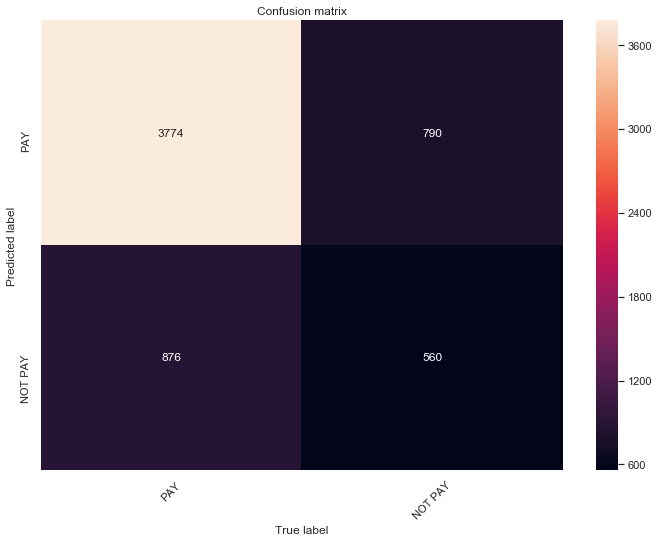

In [410]:
conf_matr = confusion_matrix(y_pred_DT, y_test)
sns.heatmap(conf_matr,annot=True,fmt='d')
plt.title('Confusion matrix')
classes = ['', 'PAY', '', 'NOT PAY', '']
tick_marks = [0, 0.5, 1 , 1.5, 2]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('True label')
plt.ylabel('Predicted label')

Посчитаем различные метрики качества для данной модели

In [412]:
ac = accuracy_score(y_pred_DT, y_test)
ac

0.7223333333333334

#### Случайный лес

In [417]:
clf2 = RandomForestClassifier()
clf2.fit(x_train, y_train)
y_perd_RF = clf2.predict(x_test)

Text(81.8, 0.5, 'Predicted label')

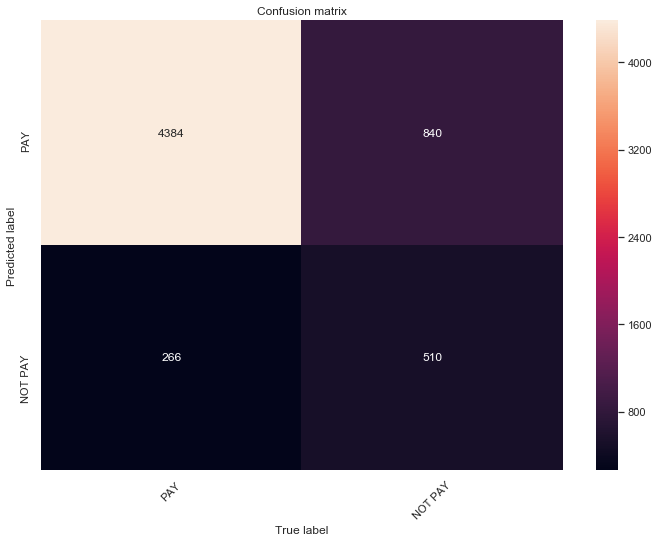

In [420]:
conf_matr = confusion_matrix(y_perd_RF, y_test)
sns.heatmap(conf_matr,annot=True,fmt='d')
plt.title('Confusion matrix')
classes = ['', 'PAY', '', 'NOT PAY', '']
tick_marks = [0, 0.5, 1 , 1.5, 2]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [423]:
ac = accuracy_score(y_perd_RF, y_test)
ac

0.8156666666666667

In [425]:
print("f1 score : ", f1_score(y_test, y_perd_RF))

f1 score :  0.4797742238946378


In [436]:
import xgboost as xgb

In [452]:
clf4 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=3)
clf4.fit(x_train, y_train)
y_pred_XGB = clf4.predict(x_test)

In [453]:
ac = accuracy_score(y_pred_XGB, y_test)
ac

0.8163333333333334

Text(81.8, 0.5, 'Predicted label')

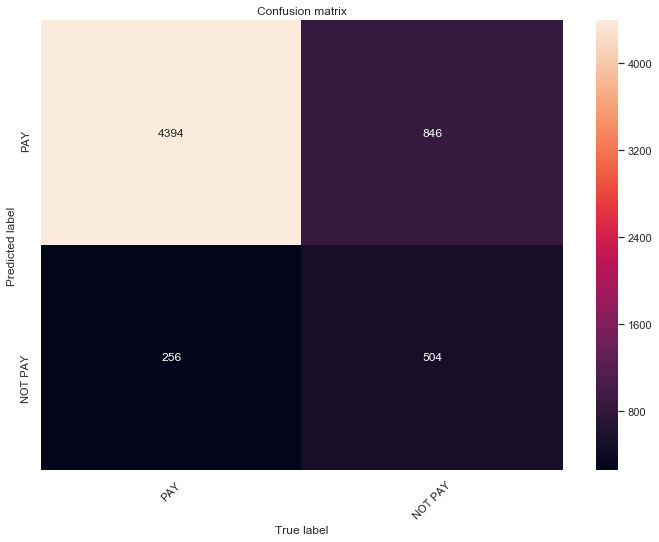

In [454]:
cm = confusion_matrix(y_pred_XGB, y_test)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion matrix')
classes = ['', 'PAY', '', 'NOT PAY', '']
tick_marks = [0, 0.5, 1 , 1.5, 2]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [455]:
print("f1 score : ", f1_score(y_test, y_pred_XGB))

f1 score :  0.47772511848341226


In [ ]:
 np.array(s_diff.append(series[i + 1] - series[i]) for i in range(len(series) - 1))